<a href="https://colab.research.google.com/github/gabriellycristine1/Projetos_e_Atividades_Python/blob/main/PLACAS_DE_TRANSITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import pickle
import seaborn as sns
import zipfile
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [5]:
with open('/content/traffic-signs-data/train.p','rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p','rb') as test_data:
  test = pickle.load(test_data)
with open('/content/traffic-signs-data/valid.p','rb') as valid_data:
  valid = pickle.load(valid_data)

In [6]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [7]:
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_valid, y_valid = valid['features'], valid['labels']

In [8]:
x_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [9]:
x_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

31

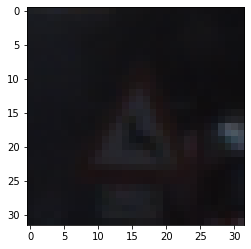

In [10]:
i = 30
plt.imshow(x_valid[i])
y_valid[i]

In [11]:
from sklearn.utils import shuffle

In [12]:
x_train, y_train = shuffle(x_train, y_train)

In [13]:
x_train_gray = np.sum(x_train, axis=3, keepdims=True)
x_test_gray = np.sum(x_test, axis=3, keepdims=True)
x_valid_gray = np.sum(x_valid, axis=3, keepdims=True)

In [14]:
x_train_gray.shape,x_test_gray.shape,x_valid_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [15]:
x_train_gray_norma = (x_train_gray - 120)/120
x_test_gray_norma = (x_test_gray - 1)/1
x_valid_gray_norma = (x_valid_gray - 1)/1

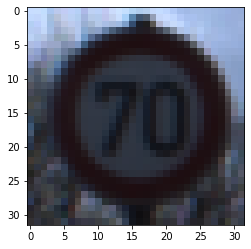

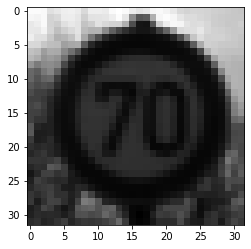

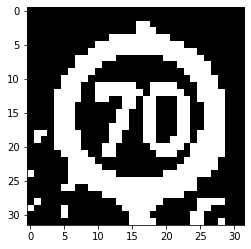

In [16]:
i = 30
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray[i].squeeze(),cmap ='gray')
plt.figure()
plt.imshow(x_train_gray_norma[i].squeeze(),cmap = 'gray')

In [17]:
from tensorflow.keras import layers, models

In [18]:
leNet = models.Sequential()

leNet.add(layers.Conv2D(6,(5,5), activation='relu',input_shape = (32,32,1)))
leNet.add(layers.AveragePooling2D())

leNet.add(layers.Conv2D(16,(5,5),activation='relu'))
leNet.add(layers.AveragePooling2D())

leNet.add(layers.Flatten())
leNet.add(layers.Dense(120,activation='relu'))
leNet.add(layers.Dense(84, activation = 'relu'))
leNet.add(layers.Dense(43, activation='softmax'))

leNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [19]:
leNet.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = leNet.fit(x_train_gray_norma, y_train,
                    batch_size= 100,
                    epochs=20,
                    validation_data = (x_valid_gray_norma, y_valid))

Epoch 1/20
348/348 [==============================] - 20s 56ms/step - loss: 3.4444 - accuracy: 0.0737 - val_loss: 3.6853 - val_accuracy: 0.0476
Epoch 2/20
348/348 [==============================] - 20s 56ms/step - loss: 3.4441 - accuracy: 0.0737 - val_loss: 3.6888 - val_accuracy: 0.0476
Epoch 3/20
348/348 [==============================] - 20s 56ms/step - loss: 3.4433 - accuracy: 0.0737 - val_loss: 3.6916 - val_accuracy: 0.0476
Epoch 4/20
348/348 [==============================] - 21s 61ms/step - loss: 3.4428 - accuracy: 0.0756 - val_loss: 3.6953 - val_accuracy: 0.0476
Epoch 5/20
348/348 [==============================] - 19s 55ms/step - loss: 3.4424 - accuracy: 0.0758 - val_loss: 3.6982 - val_accuracy: 0.0476
Epoch 6/20
348/348 [==============================] - 19s 55ms/step - loss: 3.4421 - accuracy: 0.0795 - val_loss: 3.7016 - val_accuracy: 0.0476
Epoch 7/20
348/348 [==============================] - 19s 56ms/step - loss: 3.4419 - accuracy: 0.0802 - val_loss: 3.7040 - val_accuracy: